# Get started

In [1]:
import os

from haystack import Pipeline, Document
from haystack.utils import Secret
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.retrievers.in_memory import InMemoryBM25Retriever
from haystack.components.generators import OpenAIGenerator
from haystack.components.builders.prompt_builder import PromptBuilder

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


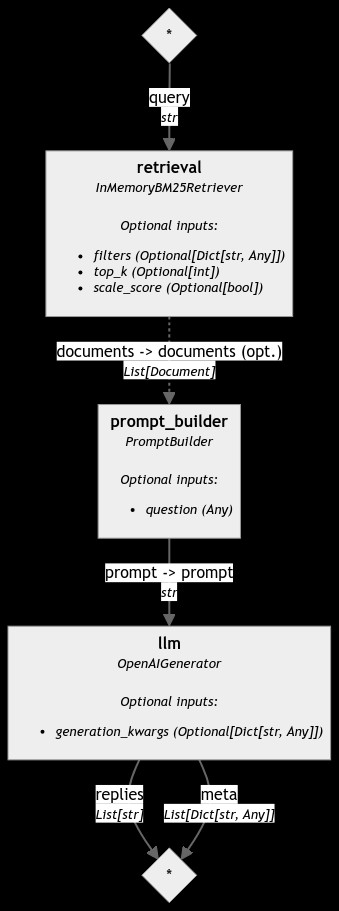

In [14]:
# Write documents to InMemoryDocumentStore
document_store = InMemoryDocumentStore()
document_store.write_documents([
    Document(content="My name is Jean and I live in Paris."), 
    Document(content="My name is Mark and I live in Berlin."), 
    Document(content="My name is Giorgio and I live in Rome.")
])

# Build a RAG pipeline
prompt_template = """
Given these documents, answer the question.
Documents:
{% for doc in documents %}
    {{ doc.content }}
{% endfor %}
Question: {{question}}
Answer:
"""

retrieval = InMemoryBM25Retriever(document_store=document_store)
prompt_builder = PromptBuilder(template=prompt_template)
api_key = ""
# TODO: ChatGPT로 가능한지 확인
llm = OpenAIGenerator(api_key=Secret.from_token(api_key))

rag_pipeline = Pipeline()
rag_pipeline.add_component("retrieval", retrieval)
rag_pipeline.add_component("prompt_builder", prompt_builder)
# TODO: ChatGPT로 가능한지 확인
rag_pipeline.add_component("llm", llm)
rag_pipeline.connect("retrieval", "prompt_builder.documents")
rag_pipeline.connect("prompt_builder", "llm")

In [15]:
# Ask a question
question = "Who lives in Paris?"
results = rag_pipeline.run(
    {
        "retrieval": {"query": question},
        "prompt_builder": {"question": question}
    }
)

print(results["llm"]["replace"])

Ranking by BM25...: 100%|███████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 44150.57 docs/s]


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}